Задание 1
Коэффициент b0 (свободный член) по формуле 1: 1.060000
Коэффициент b1 (наклон) по формуле 2: 0.992727
Коэффициент корреляции r по формуле 3: 0.998824

Задание 2
дисперсия D1 по формуле 4 равна: 0.023955

Задание 3
Значение дроби: 0.2395454545454547
Критерий Фишера F: 2.447064
Разница не значима, поправка не требуется

Задание 4
Построение графиков по исходным данным


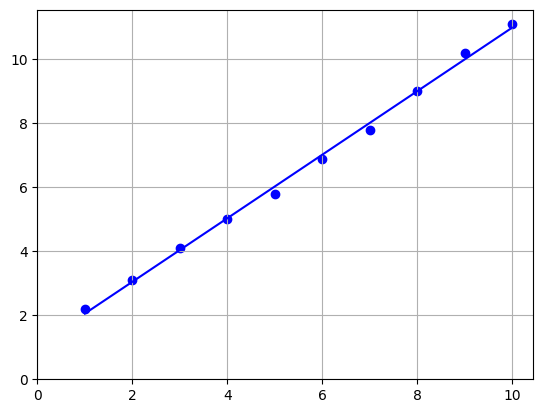

Новые значения с шумом
new_b0: 0.9852012650542064
new_b1: 1.0177195292311858


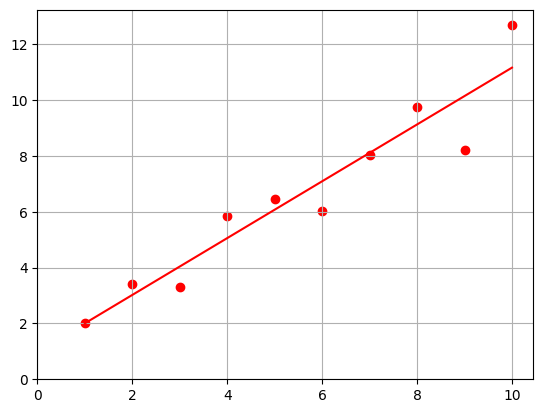

Сравнение двух графиков:


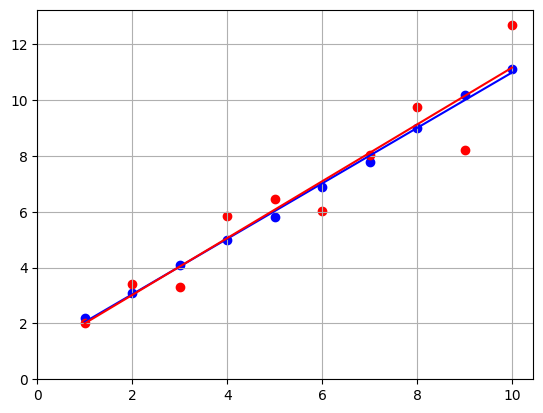

In [25]:
import random
from math import sqrt
from scipy import stats
from matplotlib import pyplot as plt

# Линейная регрессия
# y = b0 + b1 * x


# Сумма квадратов отклонений
# S = E (b0 + b1xi - yi)^2 -> min

# Необходимым условием минимума функции S являются нулевые значения частных производных по b0 и b1
# Дифференцируя функцию S получаем систему линейных уравнений.



# Вывод - средгняя точка (x̄, ȳ) совместного распределения случайных величин X и Y всегда лежит на линии решрессии.

# Тогда для определения линии регрессии достаточно знать её угловой коэффициент b1



# Для оценки силы связи используем выборочный коэффициент корреляции r
# В его формуле используются средние значения X Y а также выборочные дисперсии S_x_squared и S_y_squared

# Используя эти зависимости можно получить формулу, которая свяжет коэффициент регрессии b1 и коэффициент корреляции r:

# Эта формула коэффициента корреляции показываем величину связи между случайными ел ичинами X и Y
# b1 = r * (S_y / S_x)


# Формула погрешности от рассеяния вокруг средних a и погрешность в определении регрессии имеет формулу:

# D1 = (1 / (n-l)) * E (yi - f(xi))^2

x_values = [1,2,3,4,5,6,7,8,9,10]
y_values = [2.2,3.1,4.1,5.0,5.8,6.9,7.8,9.0,10.2,11.1]

# Дисперсия случайных воздействий:
S_squared = 0.1

# число экспериментов:
n = len(x_values)

print("Задание 1")
# Вычислить коэффициенты b0 и b1 и коэффициент корреляции

def get_b0(_x_values, _y_values):
    x_squared_sum = sum(list(x ** 2 for x in _x_values))
    x_sum = sum(_x_values)
    y_sum = sum(_y_values)
    y_x_sum = sum(list(_x_values[i] * _y_values[i] for i in range(n)))

    # b0 по формуле 1
    return (y_sum * x_squared_sum - y_x_sum * x_sum) / (n * x_squared_sum - x_sum*x_sum)

def get_b1(_x_values, _y_values):
    x_squared_sum = sum(list(x ** 2 for x in _x_values))
    x_sum = sum(_x_values)
    y_sum = sum(_y_values)
    y_x_sum = sum(list(_x_values[i] * _y_values[i] for i in range(n)))

    # b0 по формуле 1
    return (y_sum*x_sum - y_x_sum * n) / (x_sum*x_sum - n*x_squared_sum)


# b0 по формуле 1
b0 = get_b0(x_values, y_values)
# b1 по формуле 2
b1 = get_b1(x_values, y_values)

# средние значения:
x_average = sum(x_values) / n
y_average = sum(y_values) / n

# Выборочные дисперсии:
S_x = sqrt(sum(list((x - x_average)**2 for x in x_values)) / n)
S_y = sqrt(sum(list((y - y_average)**2 for y in y_values)) / n)

# Вычисляем коэффициент корреляции по формуле 3:
r = b1 * (S_x / S_y)

print(f"Коэффициент b0 (свободный член) по формуле 1: {b0:.6f}")
print(f"Коэффициент b1 (наклон) по формуле 2: {b1:.6f}")
print(f"Коэффициент корреляции r по формуле 3: {r:.6f}")


print("\nЗадание 2")
# Предсказанные значения y:
y_pred = list(b0 + b1 * x for x in x_values)


# Вычисляем дисперсию D1 по формуле 4
# В образовании дисперсии D1 участвуют: рассеяние вокруг средних a и прогрешность в определении регрессии
D1 = sum((y_values[i] - y_pred[i]) ** 2 for i in range(n)) / (n - 2)

print(f"дисперсия D1 по формуле 4 равна: {D1:.6f}")


print("\nЗадание 3")

# Уровень значимости:
p = 0.05
# Доверительный интервал: 0.95


print(f"Значение дроби: {D1 / S_squared}")
F = stats.f.ppf(0.95, n - 2, 20)
print(f"Критерий Фишера F: {F:.6f}")

if D1 / S_squared > F:
    print("Разница значима")
else:
    print("Разница не значима, поправка не требуется")


print("\nЗадание 4")

# Построение графиков по исходным данным
print("Построение графиков по исходным данным")
plt.scatter(x_values, y_values, color="blue", label="Исходные данные")
plt.plot(x_values, y_pred, color="blue", label="Линейная регрессия")
plt.ylim(0)
plt.xlim(0)
plt.grid()
plt.show()



def generate_noize(y_old, k):
    new_ys = []
    for y in y_old:
        # от -1 до 1
        num = random.random() * 2 - 1
        # y + (от -0.2 до +0.2)*y
        new_y = (num * k * y) + y
        new_ys.append(new_y)
    return new_ys


# Список новых значений с шумом
print("Новые значения с шумом")
new_y_values = generate_noize(y_values, 0.2)

new_b0 = get_b0(x_values, new_y_values)
new_b1 = get_b1(x_values, new_y_values)

print(f"new_b0: {new_b0}")
print(f"new_b1: {new_b1}")

new_y_pred = list(new_b0 + new_b1 * x for x in x_values)

plt.scatter(x_values, new_y_values, color="red", label="Данные с шумом")
plt.plot(x_values, new_y_pred, color="red", label="Линейная регрессия")
plt.ylim(0)
plt.xlim(0)
plt.grid()
plt.show()


print("Сравнение двух графиков:")
plt.scatter(x_values, y_values, color="blue")
plt.plot(x_values, y_pred, color="blue")
plt.scatter(x_values, new_y_values, color="red")
plt.plot(x_values, new_y_pred, color="red")
plt.ylim(0)
plt.xlim(0)
plt.grid()
plt.show()